# I -  Exploratory data analysis

As in different data projects, we'll first start diving into the data and build up our first intuitions.

In this section, we'll be doing four things. 

- Data extraction : we'll load the dataset and have a first look at it. 
- Cleaning : we'll fill in missing values.
- Plotting : we'll create some interesting charts that'll (hopefully) spot correlations and hidden insights out of the data.
- Assumptions : we'll formulate hypotheses from the charts.

We tweak the style of this notebook a little bit to have centered plots.

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

We import the useful libraries.

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

Two datasets are available: a training set and a test set.
We'll be using the training set to build our predictive model and the testing set to score it and generate an output file to submit on the Kaggle evaluation system.

We'll see how this procedure is done at the end of this post.

Now let's start by loading the training set.

In [3]:
data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
print (data.shape)
print (test.shape)

(95662, 16)
(45019, 15)


We have:

- 95662 rows
- 16 columns

Pandas allows you to have a sneak peak at your data.

In [5]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


The FraudResult column is the ** target variable**. If FraudResult = 1 the customer is fruadulent, otherwise he's not. The is the variable we're going to predict.

The other variables describe the customer. They are the **features**.

- TransactionId: Unique transaction identifier on platform
- BatchId: Unique number assigned to a batch of transactions for processing
- AccountId : Unique number identifying the customer on platform
- SubcriptionId : Unique number identifying the customer subcription
- CustomerId : Unique number identifter attached to account
- CurrencyCode: Country Currency
- CountryCode: Numerical geographical code of country
- ProviderId : Source provider of item bought
- ProductId : item being bought
- ProductCategory : ProductIds are organized into these broader product categories.
- ChannelId : Identifies if customer used web,Android, IOS, pay later or checkout.
- Amount : Value of the transaction. Positive for debits from customer account and negative for credit into customer account
- TransactionStartTime : Transaction Start Time 
- PricingStrategy : Category of Xente's pricing structure for merchants
- FraudResult : Fraud status of transaction 1 -yes or 0-No

Pandas allows you to a have a high-level simple statistical description of the numerical features.
This can be done using the describe method.

In [7]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [8]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


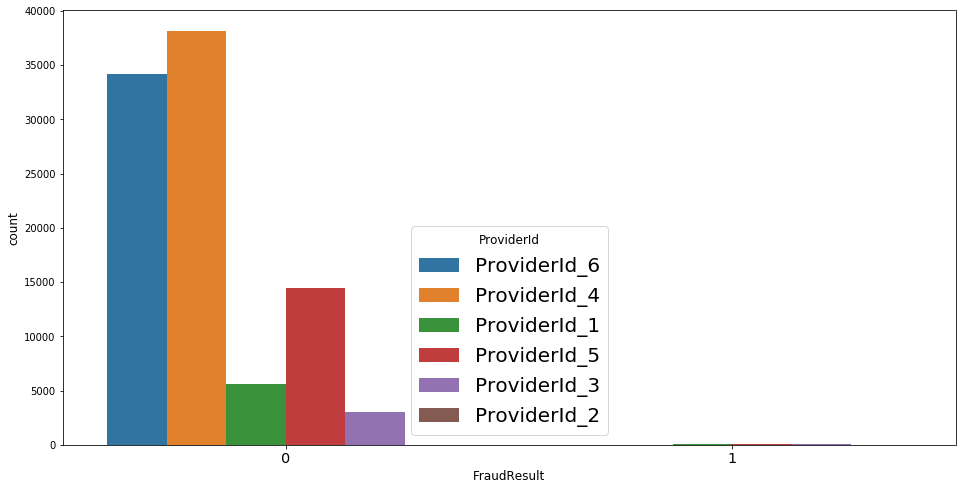

In [9]:
plt.figure(figsize=(16,8))
sns.countplot(data['FraudResult'], hue=data['ProviderId'])

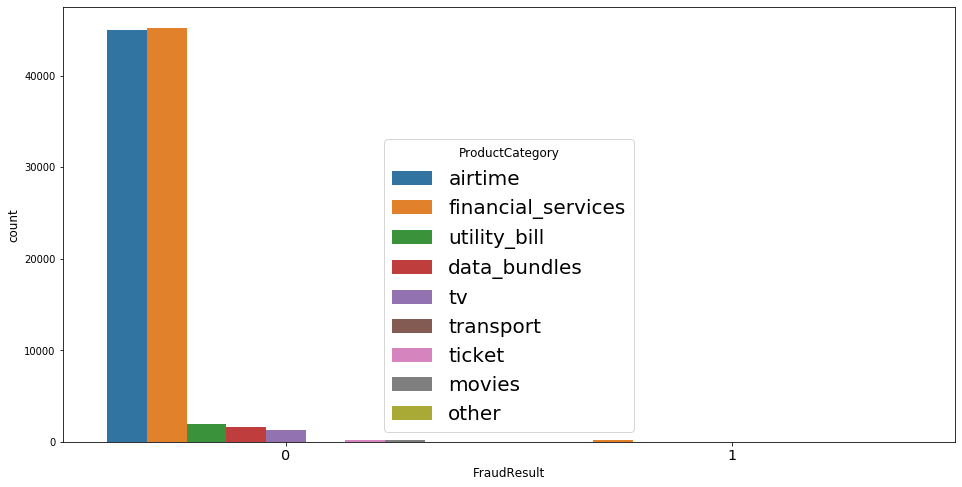

In [10]:
plt.figure(figsize=(16,8))
sns.countplot(data['FraudResult'], hue=data['ProductCategory'])

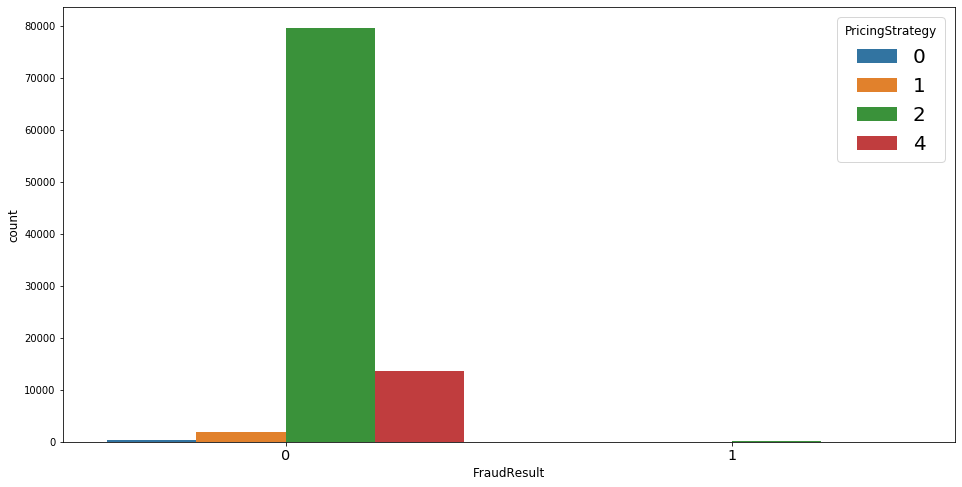

In [11]:
plt.figure(figsize=(16,8))
sns.countplot(data['FraudResult'], hue=data['PricingStrategy'])

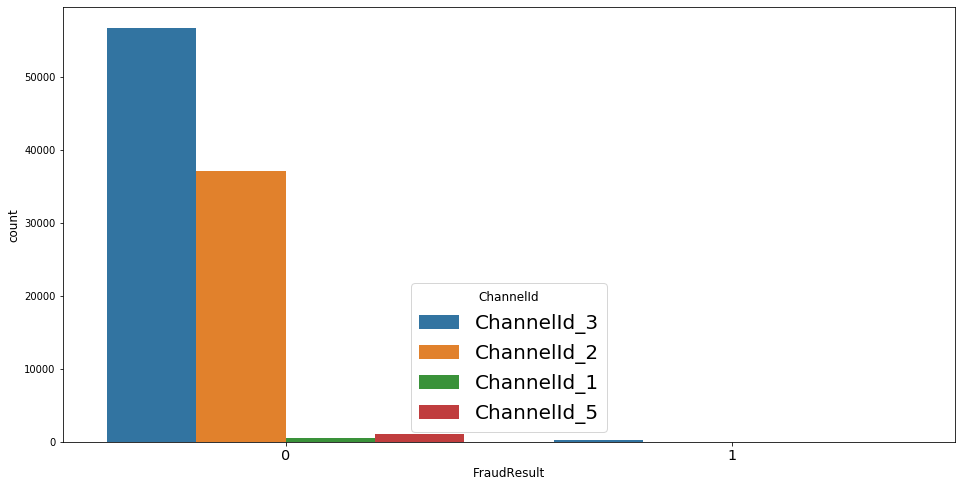

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(data['FraudResult'], hue=data['ChannelId'])

In [13]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [14]:
data.SubscriptionId.nunique()

3627

In [15]:
data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [16]:
ProviderId = pd.get_dummies(data['ProviderId'], drop_first=True,prefix='ProviderId',prefix_sep='_')
ProductCategory = pd.get_dummies(data['ProductCategory'], drop_first=True,prefix='ProductCategory',prefix_sep='_')
ChannelId = pd.get_dummies(data['ChannelId'], drop_first=True,prefix='ChannelId',prefix_sep='_')
ProductId = pd.get_dummies(data['ProductId'], drop_first=True,prefix='ProductId',prefix_sep='_')

In [17]:
ProviderId2 = pd.get_dummies(test['ProviderId'], drop_first=True,prefix='ProviderId',prefix_sep='_')
ProductCategory2 = pd.get_dummies(test['ProductCategory'], drop_first=True,prefix='ProductCategory',prefix_sep='_')
ChannelId2 = pd.get_dummies(test['ChannelId'], drop_first=True,prefix='ChannelId',prefix_sep='_')
ProductId2 = pd.get_dummies(test['ProductId'], drop_first=True,prefix='ProductId',prefix_sep='_')

In [18]:
data = pd.concat([data,ProviderId,ChannelId,ProductCategory,ProductId], axis=1)
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [19]:
test = pd.concat([test,ProviderId2,ChannelId2,ProductCategory2,ProductId2], axis=1)
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_17,ProductId_ProductId_18,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_25,ProductId_ProductId_26,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [20]:
y = data['FraudResult']

In [21]:
drop = ['TransactionId',         'BatchId',       'AccountId',
        'SubscriptionId',      'CustomerId',    'CurrencyCode',
           'CountryCode',      'ProviderId',       'ProductId',
       'ProductCategory','ChannelId', 'TransactionStartTime','FraudResult', 'ProductCategory_other', 'ProductId_ProductId_12']
data.drop(drop, axis=1, inplace=True)
drop1 = ['TransactionId',         'BatchId',       'AccountId',
        'SubscriptionId',      'CustomerId',    'CurrencyCode',
           'CountryCode',      'ProviderId',       'ProductId',
       'ProductCategory','ChannelId', 'TransactionStartTime']
test.drop(drop1, axis=1, inplace=True)

In [22]:
len(data.columns)

39

In [23]:
len(test.columns)

45

In [24]:
col = data.columns
test = test[col]

In [25]:
X = data

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.470604837, random_state = 42)

In [28]:
len(X_test.columns)

39

In [29]:
from imblearn.over_sampling import SMOTE
smote_edge = SMOTE(random_state=0)
smote_data_X, smote_data_y = smote_edge.fit_sample(X_train,y_train)

/home/bideen/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [30]:
smote_data_X = pd.DataFrame(data=smote_data_X, columns=X_train.columns)
smote_data_y = pd.DataFrame(data=smote_data_y, columns=['target'])

In [31]:
len(smote_data_X)

101088

In [32]:
smote_data = smote_data_X
smote_data['target'] = smote_data_y['target']
smote_data.head()

,Amount,Value,PricingStrategy,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,target
0,-1000.0,1000.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-25000.0,25000.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-20.0,20.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,500.0,500.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-25000.0,25000.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [33]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def recover_train_test_target():
    global combined
    
    targets = smote_data_y
    train = smote_data_X
    Test = test
    
    return train, Test, targets

train, test, targets = recover_train_test_target()

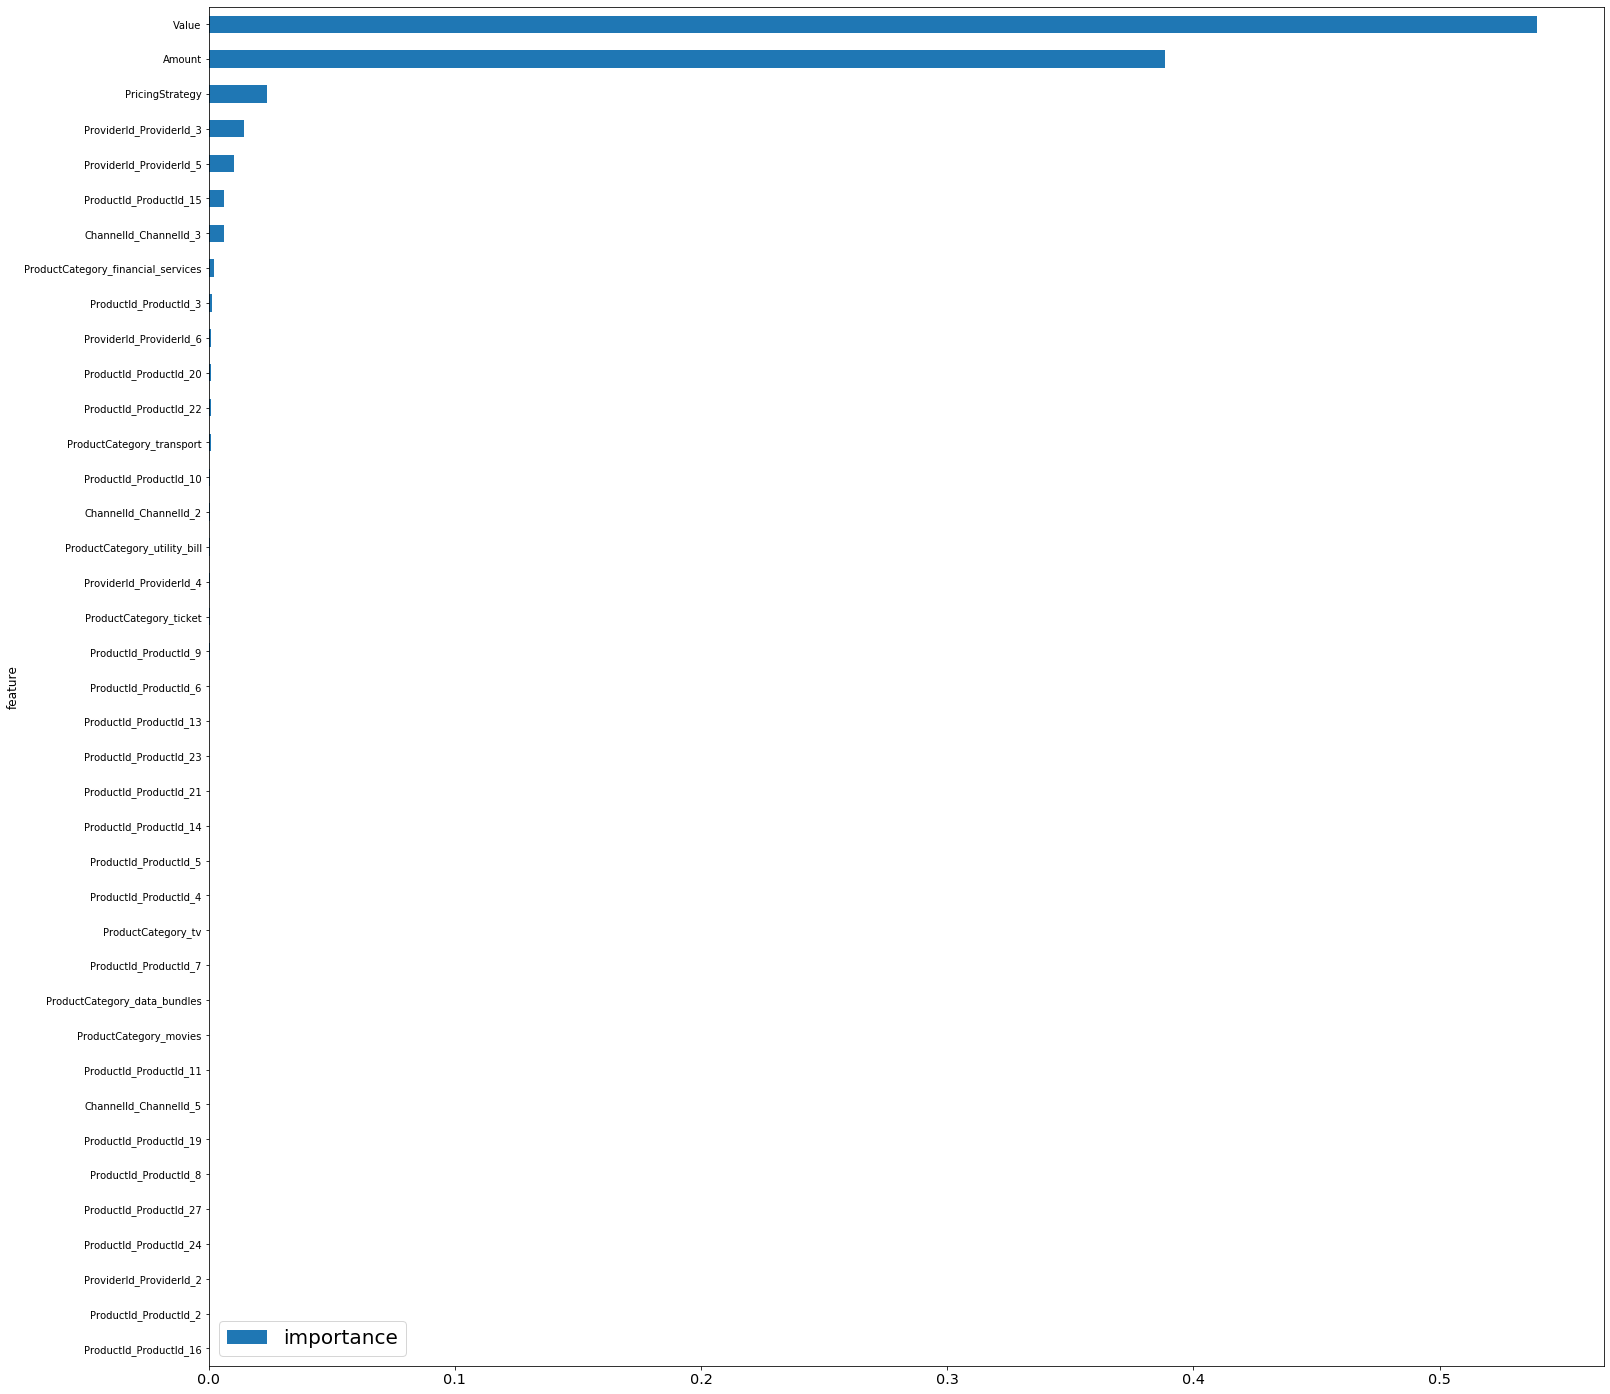

In [35]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)

features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [38]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X_train)
print (train_reduced.shape)

(50643, 2)


In [39]:
test_reduced = model.transform(test)
print (test_reduced.shape)

(45019, 2)


In [40]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [42]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=y_train, scoring='accuracy')
    print ('CV score = {0}'.format(score))
    print ('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.9985782809284668
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.9984597858163902
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.9994668577853834
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.9990719520691229
****


In [45]:
rf.fit(X_train,y_train)
logreg_cv_Pred = rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg_cv_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44925
           1       0.87      0.80      0.83        94

    accuracy                           1.00     45019
   macro avg       0.94      0.90      0.92     45019
weighted avg       1.00      1.00      1.00     45019



In [46]:
rf.fit(X_train,y_train)
logreg_cv_Pred2 = rf.predict(test)
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg_cv_Pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44925
           1       0.00      0.00      0.00        94

    accuracy                           1.00     45019
   macro avg       0.50      0.50      0.50     45019
weighted avg       1.00      1.00      1.00     45019



In [194]:
sub = pd.read_csv('data/sample_submission.csv')
sub.head()

,TransactionId,FraudResult
0,TransactionId_50600,NaN
1,TransactionId_95109,NaN
2,TransactionId_47357,NaN
3,TransactionId_28185,NaN
4,TransactionId_22140,NaN


In [216]:
logreg_cv_sub = pd.DataFrame()

logreg_cv_sub['TransactionId'] = sub['TransactionId']
logreg_cv_sub['FraudResult'] = logreg_cv_Pred2

logreg_cv_sub.head()

,TransactionId,FraudResult
0,TransactionId_50600,0
1,TransactionId_95109,0
2,TransactionId_47357,0
3,TransactionId_28185,0
4,TransactionId_22140,0


In [217]:
logreg_cv_sub.to_csv('logreg_cv_sub.csv', index=False)

In [218]:
gboost.fit(X_train,y_train)
xgb_Pred = gboost.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44925
           1       0.99      0.81      0.89        94

    accuracy                           1.00     45019
   macro avg       0.99      0.90      0.94     45019
weighted avg       1.00      1.00      1.00     45019



In [219]:
gboost.fit(X_train,y_train)
xgb_Pred2 = gboost.predict(test)
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_Pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44925
           1       0.00      0.00      0.00        94

    accuracy                           1.00     45019
   macro avg       0.50      0.50      0.50     45019
weighted avg       1.00      1.00      1.00     45019



In [220]:
xgb_sub = pd.DataFrame()

xgb_sub['TransactionId'] = sub['TransactionId']
xgb_sub['FraudResult'] = xgb_Pred

xgb_sub.head()

,TransactionId,FraudResult
0,TransactionId_50600,0
1,TransactionId_95109,0
2,TransactionId_47357,0
3,TransactionId_28185,0
4,TransactionId_22140,0


In [211]:
xgb_sub.to_csv('xgb_Xente3.csv', index=False)